In [5]:
import numpy as np
import cv2
import joblib

# FaceDetection

In [6]:
def test_face_detector(img_path):
    img = cv2.imread(img_path)

    if img is None:
        print("image not loaded successfully")
        return 

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(
        r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\haarcascade_classifier\haarcascade_frontalface_default.xml"
    )

    if face_cascade.empty():
        print("error in loading haar cascade classifier file")
        return 

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

test_face_detector(r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\ronaldo.jpg")


# multiple face detction

In [7]:
def multiple_faces(img_path):
    img = cv2.imread(img_path)

    if img is None:
        print("image not loaded successfully")
        return
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(
        r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\haarcascade_classifier\haarcascade_frontalface_default.xml"
    )

    if face_cascade.empty():
        print("face cascade not loaded successfully")
        return
    
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=8
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("face detection", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

multiple_faces(
    r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\group.jpg"
)




# Face Recognition Using Facenet

In [8]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

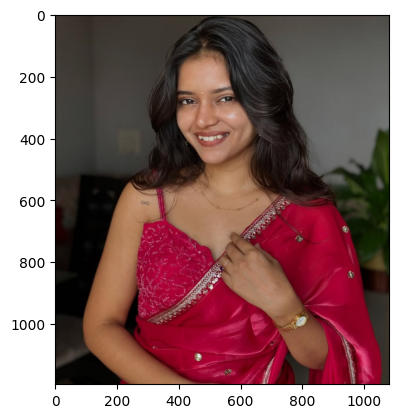

In [9]:
img=cv2.imread(
    r'C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\dataset\shivani\shivani5.jpeg'
    )
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [10]:
from mtcnn.mtcnn import MTCNN
detector= MTCNN()
result=detector.detect_faces(img)

In [11]:
result

[{'box': [394, 147, 242, 327],
  'confidence': np.float64(0.9997089505195618),
  'keypoints': {'nose': [np.int64(476), np.int64(352)],
   'mouth_right': [np.int64(565), np.int64(380)],
   'right_eye': [np.int64(548), np.int64(276)],
   'left_eye': [np.int64(434), np.int64(282)],
   'mouth_left': [np.int64(451), np.int64(387)]}}]

In [12]:
x,y,w,h=result[0]['box']

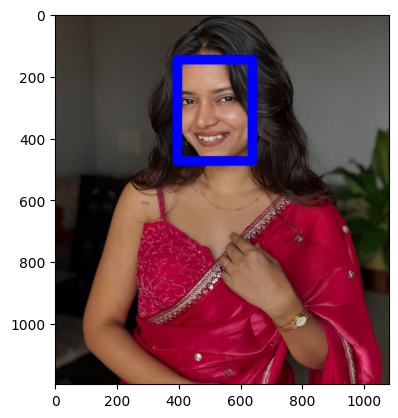

In [13]:
img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),30)
plt.imshow(img)

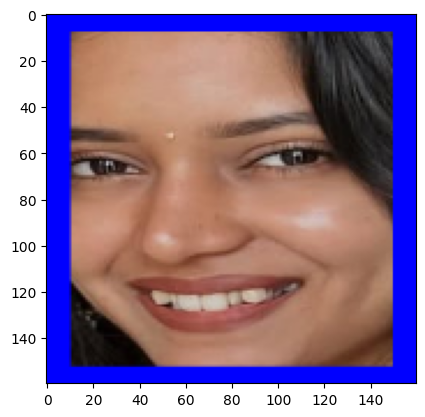

In [14]:
shivani_face=img[y:y+h,x:x+w]
shivani_face=cv2.resize(shivani_face,(160,160))
plt.imshow(shivani_face)

In [15]:
shivani_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

#### Automate preprocessing

In [16]:
from mtcnn import MTCNN
import os

class Faceloading:
    def __init__(self,directory):
        self.directory=directory
        self.target_size=(160,160)
        self.X=[]
        self.Y=[]
        self.detector=MTCNN()

    def extract_face(self,filename):
        img=cv2.imread(filename)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        result = self.detector.detect_faces(img)
        if not result:
            return None
        x,y,w,h=self.detector.detect_faces(img)[0]['box']
        x,y=abs(x),abs(y)
        face=img[y:y+h,x:x+w]
        face_arr=cv2.resize(face,self.target_size)
        return face_arr
    
    def load_faces(self,dir):
        FACES=[]
        for img_name in os.listdir(dir):
            try:
                path = os.path.join(dir, img_name)
                single_face=self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES
    
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            FACES=self.load_faces(path)
            labels=[sub_dir for _ in range(len(FACES))]
            print(f"Loaded succesfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X),np.asarray(self.Y)
    
    def plot_images(self):
        plt.Figure(figsize=(12,12))
        for num,image in enumerate(self.X):

            ncols=3
            nrows = (len(self.Y) + ncols - 1) // ncols
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

    

    





In [17]:
faceloading=Faceloading(r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\dataset")
X,Y=faceloading.load_classes()

Loaded succesfully: 13
Loaded succesfully: 11
Loaded succesfully: 11
Loaded succesfully: 9
Loaded succesfully: 11
Loaded succesfully: 10
Loaded succesfully: 8
Loaded succesfully: 10
Loaded succesfully: 10


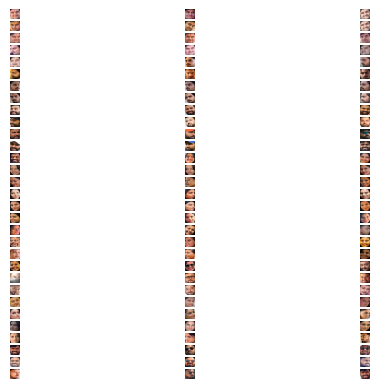

In [18]:
faceloading.plot_images()

#### FaceNet

In [19]:
from keras_facenet import FaceNet
from scipy import spatial
embedder=FaceNet()

def get_embedings(face_img):
    face_img=face_img.astype('float')
    face_img=np.expand_dims(face_img,axis=0)
    yhat=embedder.embeddings(face_img)
    return yhat[0]


In [20]:
EMBEDDED_X=[]
for img in X:
    EMBEDDED_X.append(get_embedings(img))
EMBEDDED_X=np.asarray(EMBEDDED_X)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━

In [21]:
np.savez_compressed('faces_embeddings_done_4classes.npz',EMBEDDED_X,Y)

# SVM Model

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)



In [23]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(EMBEDDED_X,Y,shuffle=True,random_state=17)


In [25]:
from sklearn.svm import SVC
model=SVC(kernel='linear',probability=True)
model.fit(X_train,Y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
ypreds_train=model.predict(X_train)
ypreds_test=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train,ypreds_train)

1.0

In [28]:
accuracy_score(Y_test,ypreds_test)

0.9166666666666666

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
y_pred = clf.predict(X_test)
print("Prediction:", y_pred[0])

Prediction: 6


#### Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier

clf1=SVC(probability=True,kernel='linear')
clf2=LogisticRegression(max_iter=100)



In [32]:
voting_clf=VotingClassifier(
    estimators=[('svm',clf1),('lr',clf2)],
    voting='soft'
)

voting_clf.fit(X_train,Y_train)

,estimators,"[('svm', ...), ('lr', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0


In [33]:
y_prediction=voting_clf.predict(X_test)
print("voting ensemble classifier",accuracy_score(Y_test,y_pred))

voting ensemble classifier 0.875


#### Test image

In [34]:
test_im = cv2.imread(r"C:\DjangoProjects\missingperson_detection\missingpersondetectionapp\dataset\yash\yash3.jpeg")
test_face_rgb = cv2.cvtColor(test_im, cv2.COLOR_BGR2RGB)

x, y, w, h = detector.detect_faces(test_face_rgb)[0]['box']
x, y = abs(x), abs(y)

In [35]:
test_im=test_im[y:y+h,x:x+w]
test_im=cv2.resize(test_im,(160,160))
test_img=get_embedings(test_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [36]:
test_img=[test_img]
ypreds=model.predict(test_img)

In [37]:
ypreds

array([8])

In [38]:
encoder.inverse_transform(ypreds)

array(['yash'], dtype='<U9')

#### Pipeline

In [39]:
def predict_person(image_path):
    test_image=cv2.imread(image_path)
    test_face_rgb=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    x,y,w,h=detector.detect_faces(test_face_rgb)[0]['box']
    x,y=abs(x),abs(y)
    test_image=test_image[y:y+h,x:x+w]
    test_image=cv2.resize(test_image,(160,160))
    test_image=get_embedings(test_image)
    test_image=test_image
    ypred=model.predict(test_image)
    result=encoder.inverse_transform(ypred)
    return result[0]


In [40]:
def detect_missing_person_in_video(video_path,missing_person_name):
    cap=cv2.VideoCapture(video_path)
    frame_number = 0 

    while True:
        ret,frame=cap.read()
        if not ret:
            print("could not read frame")
            break

        if frame_number % 10 == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(frame_rgb)
            if not faces:
                continue
            x,y,w,h = faces[0]['box']
            x,y=abs(x),abs(y)
            face_img = frame[y:y+h,x:x+w]
            face_img = cv2.resize(face_img, (160,160))
            face_embeddings = get_embedings(face_img)
            ypred=model.predict([face_embeddings])
            result=encoder.inverse_transform(ypred)
            print(f"Processing frame {frame_number}")
            if result[0] == missing_person_name:
                print(f"FOUND {missing_person_name} at frame {frame_number}!")
        
        frame_number += 1
        
        
    
    cap.release()
        

In [41]:
detect_missing_person_in_video("yashi_video.mp4","yash")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Processing frame 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Processing frame 10
FOUND yash at frame 10!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing frame 20
FOUND yash at frame 20!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Processing frame 30
FOUND yash at frame 30!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Processing frame 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Processing frame 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Processing frame 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Processing frame 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Processing frame 80
FOUND yash at frame 80!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing frame 90
FOUND yash at frame 90!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing frame 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Processing frame 110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Processing frame 120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Processing frame 130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Processing frame 140
1/1 ━━

#### Saving Model 

In [42]:
import pickle

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('voting_classifier.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [43]:
np.save('face_embeddings.npy', EMBEDDED_X)
np.save('face_labels.npy', Y)

In [44]:
joblib.dump(model, "face_detection_model.pkl")


['face_detection_model.pkl']